# Sprint4
## ロジスティック回帰のスクラッチ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.random import *
from sklearn.datasets import load_iris

## Irisデータ取得

In [2]:
iris=load_iris()

In [3]:
X=iris.data[50:,2:]
y=iris.target[50:]-1

## 【問題1】仮定関数
## 【問題2】最急降下法
## 【問題4】目的関数

In [4]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------

    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    lam : lambda
      正則化の値
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, no_bias, verbose,lam):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.lam=lam
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        np.random.seed(0)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #バイアスの有無に対する場合分け
        if self.no_bias==True:
            self.bias=0
        else:
            self.bias=np.random.rand()
            
        #サンプル数の定義
        self.m=X.shape[0]
        
        #シータの初期値取得
        self.theta=np.random.randn(X.shape[1])
        
        #学習をself.iter回繰り返す
        for i in range(self.iter):
            #仮定関数作成
            self.h=self.sigmoid_function(X)
            
            #最急降下法によるシータとバイアスの更新
            self._gradient_descent(X,y)
            
            #目的関数作成
            #lossとval_lossの格納
            self.loss[i]=self.compute_cost(X,y)
            self.val_loss[i]=self.compute_cost(X_val,y_val)
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目: {}".format(i+1,self.loss[i]))


    def predict(self, X,thetashould=0.5):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
       thetashould : 閾値　def＝０.５
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        y_pred=np.array([])
        for i in range(X.shape[0]):
            if self.sigmoid_function(X)[i]>=0.5:
                y_pred=np.append(y_pred,1)
            else:
                y_pred=np.append(y_pred,0)
        return y_pred
       
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        return self.sigmoid_function(X)
    
    def sigmoid_function(self, X):
        """
        シグモイド関数を通して仮定関数を返す
        """
        z=np.dot(self.theta,X.T) +self.bias
        h=1/(1+np.exp(-z))
        return h
        
    def _gradient_descent(self, X, y):
        """
        thetaとbiasの更新
        """
        error=(self.h-y).reshape(-1,1)
        self.theta=self.theta-self.lr* (((1/self.m)*(error*X).sum(axis=0))+(self.lam/self.m)*self.theta)
        
        if not self.no_bias:
            self.bias=self.bias-self.lr*((1/self.m)*(error.sum()))
        
    def compute_cost(self,X,y):
        """
        目的関数を返す
        """
        h=self.sigmoid_function(X)
        m=X.shape[0]
        J=(1/m) * ((-y*np.log(h) - (1-y)*np.log(1-h))).sum() + (self.lam/(2*m)) * (self.theta**2).sum()
        
        return J
        

In [38]:
model=ScratchLogisticRegression(50000, 0.1, False, True, 0.01)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25,random_state=9999)

In [40]:
model.fit(X_train, y_train, X_test,y_test)

1回目: 2.2885566594325084
2回目: 1.8281135863996942
3回目: 1.392690993860763
4回目: 1.019128177907393
5回目: 0.7669835862905822
6回目: 0.6603513839193103
7回目: 0.6357861653249672
8回目: 0.6318315593562059
9回目: 0.6308539531860328
10回目: 0.6302202372857222
11回目: 0.62962462787463
12回目: 0.6290342212485828
13回目: 0.6284455524410113
14回目: 0.6278582557564547
15回目: 0.6272722895689588
16回目: 0.626687646111166
17回目: 0.6261043211682095
18回目: 0.6255223109087041
19回目: 0.6249416115518629
20回目: 0.6243622193320773
21回目: 0.6237841304950021
22回目: 0.6232073412970693
23回目: 0.6226318480054036
24回目: 0.6220576468977947
25回目: 0.6214847342626789
26回目: 0.6209131063991226
27回目: 0.6203427596168083
28回目: 0.6197736902360181
29回目: 0.6192058945876192
30回目: 0.6186393690130475
31回目: 0.6180741098642926
32回目: 0.6175101135038823
33回目: 0.6169473763048655
34回目: 0.6163858946507969
35回目: 0.6158256649357206
36回目: 0.6152666835641529
37回目: 0.6147089469510667
38回目: 0.6141524515218735
39回目: 0.6135971937124074
40回目: 0.613043169968908
41回目: 0.6124903

800回目: 0.3905349025591231
801回目: 0.3903827592378683
802回目: 0.39023080915349606
803回目: 0.3900790519332302
804回目: 0.38992748720523307
805回目: 0.3897761145986018
806回目: 0.3896249337433667
807回目: 0.3894739442704875
808回目: 0.38932314581185107
809回目: 0.38917253800026824
810回目: 0.3890221204694711
811回目: 0.3888718928541108
812回目: 0.38872185478975346
813回目: 0.3885720059128786
814回目: 0.3884223458608762
815回目: 0.38827287427204316
816回目: 0.38812359078558156
817回目: 0.38797449504159537
818回目: 0.3878255866810876
819回目: 0.387676865345958
820回目: 0.3875283306790005
821回目: 0.3873799823238994
822回目: 0.3872318199252283
823回目: 0.3870838431284461
824回目: 0.3869360515798949
825回目: 0.3867884449267975
826回目: 0.3866410228172542
827回目: 0.38649378490024094
828回目: 0.38634673082560567
829回目: 0.3861998602440668
830回目: 0.38605317280720947
831回目: 0.38590666816748426
832回目: 0.38576034597820325
833回目: 0.3856142058935383
834回目: 0.3854682475685183
835回目: 0.38532247065902653
836回目: 0.3851768748217979
837回目: 0.3850314597144169

1637回目: 0.3070849406222824
1638回目: 0.3070192937475474
1639回目: 0.30695369946153833
1640回目: 0.30688815769805666
1641回目: 0.3068226683910148
1642回目: 0.30675723147443745
1643回目: 0.30669184688246115
1644回目: 0.30662651454933354
1645回目: 0.3065612344094137
1646回目: 0.3064960063971715
1647回目: 0.30643083044718794
1648回目: 0.30636570649415407
1649回目: 0.3063006344728711
1650回目: 0.3062356143182508
1651回目: 0.30617064596531446
1652回目: 0.30610572934919295
1653回目: 0.3060408644051263
1654回目: 0.30597605106846404
1655回目: 0.3059112892746642
1656回目: 0.3058465789592937
1657回目: 0.3057819200580278
1658回目: 0.30571731250665013
1659回目: 0.30565275624105176
1660回目: 0.3055882511972325
1661回目: 0.30552379731129836
1662回目: 0.3054593945194638
1663回目: 0.3053950427580499
1664回目: 0.30533074196348436
1665回目: 0.3052664920723021
1666回目: 0.3052022930211437
1667回目: 0.3051381447467565
1668回目: 0.3050740471859935
1669回目: 0.3050100002758137
1670回目: 0.3049460039532813
1671回目: 0.304882058155566
1672回目: 0.3048181628199426
1673回目: 0.30475

2569回目: 0.26232980356788616
2570回目: 0.26229451249882424
2571回目: 0.262259241120855
2572回目: 0.26222398941650066
2573回目: 0.26218875736830444
2574回目: 0.26215354495883086
2575回目: 0.2621183521706654
2576回目: 0.26208317898641464
2577回目: 0.2620480253887064
2578回目: 0.2620128913601893
2579回目: 0.26197777688353274
2580回目: 0.2619426819414277
2581回目: 0.2619076065165854
2582回目: 0.2618725505917381
2583回目: 0.26183751414963924
2584回目: 0.26180249717306264
2585回目: 0.2617674996448031
2586回目: 0.26173252154767623
2587回目: 0.26169756286451823
2588回目: 0.2616626235781861
2589回目: 0.2616277036715573
2590回目: 0.26159280312753014
2591回目: 0.2615579219290233
2592回目: 0.26152306005897635
2593回目: 0.2614882175003491
2594回目: 0.26145339423612185
2595回目: 0.26141859024929553
2596回目: 0.2613838055228915
2597回目: 0.26134904003995124
2598回目: 0.26131429378353704
2599回目: 0.2612795667367312
2600回目: 0.2612448588826365
2601回目: 0.26121017020437604
2602回目: 0.2611755006850928
2603回目: 0.26114085030795037
2604回目: 0.2611062190561327
2605回目: 0.

3539回目: 0.23530058182351363
3540回目: 0.2352785147954609
3541回目: 0.23525645708527618
3542回目: 0.23523440868668752
3543回目: 0.23521236959342864
3544回目: 0.23519033979923964
3545回目: 0.2351683192978658
3546回目: 0.2351463080830584
3547回目: 0.23512430614857463
3548回目: 0.23510231348817742
3549回目: 0.235080330095635
3550回目: 0.23505835596472224
3551回目: 0.23503639108921895
3552回目: 0.23501443546291084
3553回目: 0.2349924890795899
3554回目: 0.23497055193305302
3555回目: 0.2349486240171035
3556回目: 0.23492670532554996
3557回目: 0.2349047958522068
3558回目: 0.2348828955908943
3559回目: 0.2348610045354383
3560回目: 0.23483912267967036
3561回目: 0.23481725001742734
3562回目: 0.23479538654255253
3563回目: 0.2347735322488944
3564回目: 0.23475168713030706
3565回目: 0.23472985118065043
3566回目: 0.23470802439379
3567回目: 0.23468620676359694
3568回目: 0.23466439828394794
3569回目: 0.23464259894872566
3570回目: 0.2346208087518179
3571回目: 0.23459902768711843
3572回目: 0.2345772557485264
3573回目: 0.2345554929299469
3574回目: 0.23453373922529017
3575回目: 0

4445回目: 0.2184866313755116
4446回目: 0.2184710008960499
4447回目: 0.2184553757966267
4448回目: 0.21843975607429778
4449回目: 0.2184241417261211
4450回目: 0.2184085327491568
4451回目: 0.21839292914046707
4452回目: 0.21837733089711672
4453回目: 0.21836173801617217
4454回目: 0.2183461504947027
4455回目: 0.21833056832977937
4456回目: 0.21831499151847567
4457回目: 0.21829942005786718
4458回目: 0.21828385394503164
4459回目: 0.21826829317704907
4460回目: 0.21825273775100157
4461回目: 0.21823718766397388
4462回目: 0.21822164291305224
4463回目: 0.21820610349532563
4464回目: 0.2181905694078848
4465回目: 0.21817504064782323
4466回目: 0.2181595172122361
4467回目: 0.2181439990982209
4468回目: 0.2181284863028774
4469回目: 0.21811297882330744
4470回目: 0.21809747665661516
4471回目: 0.21808197979990687
4472回目: 0.21806648825029076
4473回目: 0.21805100200487754
4474回目: 0.21803552106078003
4475回目: 0.218020045415113
4476回目: 0.21800457506499374
4477回目: 0.21798911000754131
4478回目: 0.21797365023987722
4479回目: 0.21795819575912503
4480回目: 0.21794274656241042
4481

5359回目: 0.206126325587925
5360回目: 0.2061146149440219
5361回目: 0.20610290770273332
5362回目: 0.20609120386249433
5363回目: 0.20607950342174106
5364回目: 0.2060678063789104
5365回目: 0.20605611273244065
5366回目: 0.20604442248077057
5367回目: 0.20603273562234037
5368回目: 0.20602105215559097
5369回目: 0.2060093720789645
5370回目: 0.20599769539090393
5371回目: 0.20598602208985306
5372回目: 0.205974352174257
5373回目: 0.20596268564256187
5374回目: 0.20595102249321426
5375回目: 0.20593936272466232
5376回目: 0.20592770633535484
5377回目: 0.2059160533237418
5378回目: 0.20590440368827406
5379回目: 0.20589275742740334
5380回目: 0.20588111453958255
5381回目: 0.20586947502326555
5382回目: 0.20585783887690706
5383回目: 0.20584620609896281
5384回目: 0.2058345766878896
5385回目: 0.20582295064214512
5386回目: 0.20581132796018808
5387回目: 0.20579970864047803
5388回目: 0.20578809268147571
5389回目: 0.20577648008164276
5390回目: 0.20576487083944167
5391回目: 0.20575326495333596
5392回目: 0.2057416624217903
5393回目: 0.20573006324327003
5394回目: 0.20571846741624164
53

6211回目: 0.19724069161736862
6212回目: 0.19723139966904457
6213回目: 0.19722211008186646
6214回目: 0.19721282285488928
6215回目: 0.19720353798716816
6216回目: 0.19719425547775887
6217回目: 0.19718497532571783
6218回目: 0.1971756975301018
6219回目: 0.19716642208996818
6220回目: 0.19715714900437473
6221回目: 0.19714787827237992
6222回目: 0.19713860989304272
6223回目: 0.19712934386542239
6224回目: 0.197120080188579
6225回目: 0.19711081886157297
6226回目: 0.19710155988346537
6227回目: 0.19709230325331756
6228回目: 0.1970830489701916
6229回目: 0.19707379703315006
6230回目: 0.197064547441256
6231回目: 0.19705530019357292
6232回目: 0.19704605528916497
6233回目: 0.1970368127270966
6234回目: 0.1970275725064332
6235回目: 0.19701833462624022
6236回目: 0.1970090990855837
6237回目: 0.19699986588353055
6238回目: 0.1969906350191477
6239回目: 0.19698140649150297
6240回目: 0.19697218029966448
6241回目: 0.196962956442701
6242回目: 0.1969537349196817
6243回目: 0.19694451572967633
6244回目: 0.19693529887175512
6245回目: 0.1969260843449889
6246回目: 0.19691687214844875
6247回目

6798回目: 0.19216307315190695
6799回目: 0.1921550204866863
6800回目: 0.19214696970654951
6801回目: 0.1921389208108036
6802回目: 0.19213087379875604
6803回目: 0.1921228286697145
6804回目: 0.19211478542298704
6805回目: 0.19210674405788208
6806回目: 0.1920987045737085
6807回目: 0.1920906669697753
6808回目: 0.19208263124539202
6809回目: 0.19207459739986849
6810回目: 0.19206656543251485
6811回目: 0.1920585353426417
6812回目: 0.19205050712955984
6813回目: 0.19204248079258046
6814回目: 0.1920344563310152
6815回目: 0.19202643374417602
6816回目: 0.19201841303137512
6817回目: 0.19201039419192512
6818回目: 0.19200237722513896
6819回目: 0.19199436213033008
6820回目: 0.1919863489068119
6821回目: 0.19197833755389868
6822回目: 0.19197032807090456
6823回目: 0.19196232045714434
6824回目: 0.19195431471193306
6825回目: 0.19194631083458616
6826回目: 0.1919383088244193
6827回目: 0.19193030868074853
6828回目: 0.19192231040289034
6829回目: 0.19191431399016143
6830回目: 0.19190631944187897
6831回目: 0.19189832675736043
6832回目: 0.1918903359359235
6833回目: 0.19188234697688658
68

7455回目: 0.18724858609044295
7456回目: 0.1872416375254306
7457回目: 0.18723469045640992
7458回目: 0.1872277448828768
7459回目: 0.1872208008043277
7460回目: 0.18721385822025882
7461回目: 0.1872069171301672
7462回目: 0.18719997753354964
7463回目: 0.1871930394299033
7464回目: 0.18718610281872572
7465回目: 0.18717916769951437
7466回目: 0.18717223407176733
7467回目: 0.18716530193498257
7468回目: 0.18715837128865856
7469回目: 0.18715144213229384
7470回目: 0.18714451446538713
7471回目: 0.18713758828743768
7472回目: 0.18713066359794456
7473回目: 0.1871237403964074
7474回目: 0.187116818682326
7475回目: 0.18710989845520018
7476回目: 0.1871029797145302
7477回目: 0.18709606245981655
7478回目: 0.18708914669055987
7479回目: 0.1870822324062611
7480回目: 0.18707531960642135
7481回目: 0.18706840829054194
7482回目: 0.18706149845812453
7483回目: 0.1870545901086708
7484回目: 0.187047683241683
7485回目: 0.18704077785666326
7486回目: 0.18703387395311413
7487回目: 0.18702697153053846
7488回目: 0.18702007058843903
7489回目: 0.1870131711263192
7490回目: 0.1870062731436824
7491回目:

8173回目: 0.18261599469775786
8174回目: 0.1826100035102326
8175回目: 0.18260401350947877
8176回目: 0.18259802469513003
8177回目: 0.18259203706681998
8178回目: 0.18258605062418237
8179回目: 0.18258006536685134
8180回目: 0.182574081294461
8181回目: 0.18256809840664565
8182回目: 0.18256211670303976
8183回目: 0.18255613618327782
8184回目: 0.18255015684699472
8185回目: 0.1825441786938254
8186回目: 0.18253820172340482
8187回目: 0.18253222593536825
8188回目: 0.18252625132935116
8189回目: 0.18252027790498906
8190回目: 0.1825143056619176
8191回目: 0.18250833459977273
8192回目: 0.18250236471819029
8193回目: 0.18249639601680656
8194回目: 0.18249042849525782
8195回目: 0.1824844621531805
8196回目: 0.18247849699021132
8197回目: 0.18247253300598695
8198回目: 0.18246657020014442
8199回目: 0.18246060857232074
8200回目: 0.18245464812215312
8201回目: 0.182448688849279
8202回目: 0.18244273075333592
8203回目: 0.18243677383396165
8204回目: 0.18243081809079387
8205回目: 0.18242486352347068
8206回目: 0.18241891013163025
8207回目: 0.182412957914911
8208回目: 0.18240700687295103
82

8963回目: 0.17822512929314469
8964回目: 0.17821997294879507
8965回目: 0.17821481754409058
8966回目: 0.17820966307876537
8967回目: 0.17820450955255362
8968回目: 0.17819935696518965
8969回目: 0.1781942053164079
8970回目: 0.17818905460594286
8971回目: 0.17818390483352917
8972回目: 0.1781787559989015
8973回目: 0.17817360810179486
8974回目: 0.17816846114194398
8975回目: 0.17816331511908404
8976回目: 0.17815817003295012
8977回目: 0.17815302588327747
8978回目: 0.17814788266980155
8979回目: 0.17814274039225758
8980回目: 0.17813759905038132
8981回目: 0.17813245864390845
8982回目: 0.17812731917257446
8983回目: 0.1781221806361155
8984回目: 0.1781170430342674
8985回目: 0.17811190636676624
8986回目: 0.17810677063334823
8987回目: 0.1781016358337495
8988回目: 0.17809650196770666
8989回目: 0.17809136903495598
8990回目: 0.17808623703523416
8991回目: 0.1780811059682778
8992回目: 0.1780759758338237
8993回目: 0.17807084663160883
8994回目: 0.17806571836136997
8995回目: 0.1780605910228445
8996回目: 0.17805546461576943
8997回目: 0.17805033913988202
8998回目: 0.17804521459491968


9807回目: 0.17418290406634662
9808回目: 0.17417845553341973
9809回目: 0.17417400774794778
9810回目: 0.17416956070973638
9811回目: 0.17416511441859142
9812回目: 0.1741606688743189
9813回目: 0.17415622407672468
9814回目: 0.17415178002561496
9815回目: 0.17414733672079563
9816回目: 0.17414289416207304
9817回目: 0.17413845234925354
9818回目: 0.17413401128214318
9819回目: 0.1741295709605486
9820回目: 0.17412513138427607
9821回目: 0.1741206925531322
9822回目: 0.17411625446692364
9823回目: 0.17411181712545698
9824回目: 0.174107380528539
9825回目: 0.17410294467597653
9826回目: 0.17409850956757633
9827回目: 0.1740940752031454
9828回目: 0.17408964158249085
9829回目: 0.1740852087054196
9830回目: 0.17408077657173893
9831回目: 0.174076345181256
9832回目: 0.17407191453377804
9833回目: 0.17406748462911245
9834回目: 0.17406305546706674
9835回目: 0.17405862704744826
9836回目: 0.17405419937006464
9837回目: 0.17404977243472355
9838回目: 0.17404534624123263
9839回目: 0.1740409207893996
9840回目: 0.1740364960790324
9841回目: 0.17403207210993882
9842回目: 0.1740276488819269
9843

10551回目: 0.1710673325096199
10552回目: 0.17106339076226867
10553回目: 0.17105944963504688
10554回目: 0.17105550912780415
10555回目: 0.1710515692403902
10556回目: 0.17104762997265466
10557回目: 0.1710436913244474
10558回目: 0.1710397532956182
10559回目: 0.171035815886017
10560回目: 0.1710318790954937
10561回目: 0.17102794292389828
10562回目: 0.17102400737108076
10563回目: 0.1710200724368913
10564回目: 0.1710161381211799
10565回目: 0.17101220442379683
10566回目: 0.1710082713445923
10567回目: 0.17100433888341668
10568回目: 0.1710004070401201
10569回目: 0.17099647581455316
10570回目: 0.1709925452065661
10571回目: 0.17098861521600958
10572回目: 0.17098468584273405
10573回目: 0.17098075708658997
10574回目: 0.17097682894742827
10575回目: 0.17097290142509924
10576回目: 0.17096897451945392
10577回目: 0.1709650482303429
10578回目: 0.17096112255761714
10579回目: 0.17095719750112748
10580回目: 0.17095327306072478
10581回目: 0.1709493492362601
10582回目: 0.1709454260275843
10583回目: 0.1709415034345487
10584回目: 0.1709375814570043
10585回目: 0.1709336600948022
105

11376回目: 0.16801304685800897
11377回目: 0.1680095698919116
11378回目: 0.1680060934370871
11379回目: 0.1680026174934201
11380回目: 0.16799914206079525
11381回目: 0.16799566713909705
11382回目: 0.1679921927282102
11383回目: 0.1679887188280195
11384回目: 0.1679852454384095
11385回目: 0.16798177255926516
11386回目: 0.16797830019047116
11387回目: 0.1679748283319124
11388回目: 0.16797135698347374
11389回目: 0.16796788614504005
11390回目: 0.1679644158164964
11391回目: 0.1679609459977276
11392回目: 0.16795747668861885
11393回目: 0.167954007889055
11394回目: 0.16795053959892137
11395回目: 0.1679470718181029
11396回目: 0.1679436045464849
11397回目: 0.1679401377839525
11398回目: 0.1679366715303909
11399回目: 0.16793320578568544
11400回目: 0.16792974054972126
11401回目: 0.1679262758223839
11402回目: 0.16792281160355874
11403回目: 0.1679193478931309
11404回目: 0.16791588469098614
11405回目: 0.1679124219970098
11406回目: 0.1679089598110874
11407回目: 0.16790549813310454
11408回目: 0.16790203696294675
11409回目: 0.16789857630049965
11410回目: 0.16789511614564906
1141

12180回目: 0.16537322565577853
12181回目: 0.16537012534040682
12182回目: 0.1653670254539018
12183回目: 0.1653639259961729
12184回目: 0.1653608269671291
12185回目: 0.16535772836667983
12186回目: 0.16535463019473443
12187回目: 0.16535153245120207
12188回目: 0.16534843513599232
12189回目: 0.1653453382490145
12190回目: 0.16534224179017784
12191回目: 0.16533914575939201
12192回目: 0.16533605015656636
12193回目: 0.1653329549816103
12194回目: 0.1653298602344336
12195回目: 0.16532676591494558
12196回目: 0.16532367202305584
12197回目: 0.165320578558674
12198回目: 0.1653174855217097
12199回目: 0.1653143929120726
12200回目: 0.16531130072967232
12201回目: 0.16530820897441859
12202回目: 0.165305117646221
12203回目: 0.16530202674498953
12204回目: 0.1652989362706338
12205回目: 0.1652958462230637
12206回目: 0.16529275660218906
12207回目: 0.16528966740791962
12208回目: 0.16528657864016533
12209回目: 0.1652834902988361
12210回目: 0.1652804023838419
12211回目: 0.16527731489509262
12212回目: 0.16527422783249823
12213回目: 0.1652711411959688
12214回目: 0.16526805498541441
12

13034回目: 0.1628729171646067
13035回目: 0.16287015255822523
13036回目: 0.16286738831184414
13037回目: 0.16286462442539187
13038回目: 0.16286186089879717
13039回目: 0.16285909773198845
13040回目: 0.1628563349248945
13041回目: 0.16285357247744375
13042回目: 0.1628508103895649
13043回目: 0.1628480486611866
13044回目: 0.16284528729223754
13045回目: 0.16284252628264648
13046回目: 0.1628397656323419
13047回目: 0.16283700534125276
13048回目: 0.1628342454093078
13049回目: 0.16283148583643567
13050回目: 0.16282872662256517
13051回目: 0.16282596776762526
13052回目: 0.1628232092715446
13053回目: 0.1628204511342521
13054回目: 0.1628176933556766
13055回目: 0.1628149359357471
13056回目: 0.16281217887439234
13057回目: 0.16280942217154132
13058回目: 0.16280666582712303
13059回目: 0.1628039098410664
13060回目: 0.1628011542133004
13061回目: 0.16279839894375403
13062回目: 0.1627956440323563
13063回目: 0.16279288947903622
13064回目: 0.16279013528372296
13065回目: 0.16278738144634544
13066回目: 0.16278462796683302
13067回目: 0.16278187484511444
13068回目: 0.1627791220811192

13836回目: 0.16076552859280074
13837回目: 0.16076303130559452
13838回目: 0.1607605343267719
13839回目: 0.1607580376562752
13840回目: 0.1607555412940464
13841回目: 0.1607530452400278
13842回目: 0.1607505494941616
13843回目: 0.16074805405638992
13844回目: 0.1607455589266551
13845回目: 0.1607430641048992
13846回目: 0.16074056959106472
13847回目: 0.1607380753850936
13848回目: 0.1607355814869285
13849回目: 0.16073308789651147
13850回目: 0.16073059461378492
13851回目: 0.16072810163869114
13852回目: 0.1607256089711724
13853回目: 0.16072311661117117
13854回目: 0.16072062455862982
13855回目: 0.1607181328134907
13856回目: 0.16071564137569622
13857回目: 0.16071315024518873
13858回目: 0.1607106594219108
13859回目: 0.16070816890580475
13860回目: 0.16070567869681301
13861回目: 0.16070318879487822
13862回目: 0.16070069919994276
13863回目: 0.16069820991194914
13864回目: 0.16069572093083992
13865回目: 0.16069323225655754
13866回目: 0.16069074388904458
13867回目: 0.16068825582824378
13868回目: 0.16068576807409746
13869回目: 0.16068328062654835
13870回目: 0.160680793485539

14592回目: 0.15896163025617027
14593回目: 0.15895935059805233
14594回目: 0.15895707120848834
14595回目: 0.15895479208743063
14596回目: 0.15895251323483092
14597回目: 0.1589502346506417
14598回目: 0.15894795633481487
14599回目: 0.1589456782873027
14600回目: 0.1589434005080572
14601回目: 0.15894112299703075
14602回目: 0.15893884575417538
14603回目: 0.15893656877944332
14604回目: 0.15893429207278678
14605回目: 0.15893201563415787
14606回目: 0.15892973946350894
14607回目: 0.15892746356079224
14608回目: 0.15892518792595992
14609回目: 0.15892291255896437
14610回目: 0.15892063745975768
14611回目: 0.15891836262829231
14612回目: 0.15891608806452037
14613回目: 0.15891381376839436
14614回目: 0.1589115397398665
14615回目: 0.15890926597888913
14616回目: 0.15890699248541448
14617回目: 0.15890471925939512
14618回目: 0.15890244630078332
14619回目: 0.15890017360953135
14620回目: 0.15889790118559172
14621回目: 0.1588956290289168
14622回目: 0.158893357139459
14623回目: 0.15889108551717077
14624回目: 0.1588888141620045
14625回目: 0.1588865430739126
14626回目: 0.158884272252

15369回目: 0.15726773531389696
15370回目: 0.1572656507367623
15371回目: 0.1572635663942123
15372回目: 0.15726148228620718
15373回目: 0.15725939841270697
15374回目: 0.1572573147736719
15375回目: 0.15725523136906225
15376回目: 0.1572531481988383
15377回目: 0.1572510652629599
15378回目: 0.1572489825613876
15379回目: 0.1572469000940814
15380回目: 0.15724481786100186
15381回目: 0.15724273586210893
15382回目: 0.15724065409736282
15383回目: 0.15723857256672408
15384回目: 0.15723649127015274
15385回目: 0.15723441020760917
15386回目: 0.15723232937905376
15387回目: 0.1572302487844466
15388回目: 0.1572281684237482
15389回目: 0.1572260882969187
15390回目: 0.15722400840391842
15391回目: 0.15722192874470797
15392回目: 0.1572198493192474
15393回目: 0.15721777012749724
15394回目: 0.15721569116941772
15395回目: 0.15721361244496937
15396回目: 0.1572115339541125
15397回目: 0.15720945569680744
15398回目: 0.1572073776730146
15399回目: 0.15720529988269455
15400回目: 0.15720322232580755
15401回目: 0.15720114500231397
15402回目: 0.15719906791217447
15403回目: 0.1571969910553493

16060回目: 0.15588111858111572
16061回目: 0.1558791870852049
16062回目: 0.15587725579840847
16063回目: 0.15587532472069265
16064回目: 0.15587339385202317
16065回目: 0.1558714631923661
16066回目: 0.15586953274168733
16067回目: 0.1558676024999529
16068回目: 0.15586567246712874
16069回目: 0.15586374264318076
16070回目: 0.15586181302807514
16071回目: 0.15585988362177763
16072回目: 0.15585795442425437
16073回目: 0.1558560254354714
16074回目: 0.15585409665539485
16075回目: 0.15585216808399022
16076回目: 0.1558502397212242
16077回目: 0.1558483115670625
16078回目: 0.15584638362147116
16079回目: 0.1558444558844163
16080回目: 0.155842528355864
16081回目: 0.15584060103578035
16082回目: 0.15583867392413134
16083回目: 0.15583674702088318
16084回目: 0.1558348203260017
16085回目: 0.15583289383945337
16086回目: 0.1558309675612041
16087回目: 0.15582904149121996
16088回目: 0.15582711562946713
16089回目: 0.15582518997591185
16090回目: 0.15582326453052
16091回目: 0.15582133929325798
16092回目: 0.15581941426409182
16093回目: 0.15581748944298776
16094回目: 0.15581556482991185

16839回目: 0.15443728815232208
16840回目: 0.15443550979635395
16841回目: 0.1544337316250973
16842回目: 0.15443195363852352
16843回目: 0.15443017583660376
16844回目: 0.15442839821930918
16845回目: 0.15442662078661112
16846回目: 0.1544248435384808
16847回目: 0.15442306647488946
16848回目: 0.15442128959580853
16849回目: 0.1544195129012091
16850回目: 0.15441773639106246
16851回目: 0.15441596006533997
16852回目: 0.154414183924013
16853回目: 0.1544124079670526
16854回目: 0.15441063219443024
16855回目: 0.15440885660611728
16856回目: 0.15440708120208485
16857回目: 0.1544053059823044
16858回目: 0.15440353094674733
16859回目: 0.15440175609538476
16860回目: 0.15439998142818823
16861回目: 0.15439820694512893
16862回目: 0.1543964326461783
16863回目: 0.15439465853130777
16864回目: 0.15439288460048856
16865回目: 0.1543911108536921
16866回目: 0.15438933729088974
16867回目: 0.15438756391205297
16868回目: 0.15438579071715294
16869回目: 0.15438401770616128
16870回目: 0.15438224487904934
16871回目: 0.15438047223578855
16872回目: 0.15437869977635002
16873回目: 0.154376927500

17553回目: 0.1532128836873267
17554回目: 0.15321123024375202
17555回目: 0.15320957696580545
17556回目: 0.1532079238534622
17557回目: 0.15320627090669742
17558回目: 0.15320461812548633
17559回目: 0.15320296550980417
17560回目: 0.15320131305962606
17561回目: 0.15319966077492722
17562回目: 0.15319800865568314
17563回目: 0.15319635670186874
17564回目: 0.15319470491345938
17565回目: 0.15319305329043031
17566回目: 0.15319140183275676
17567回目: 0.1531897505404138
17568回目: 0.15318809941337722
17569回目: 0.1531864484516217
17570回目: 0.15318479765512277
17571回目: 0.15318314702385574
17572回目: 0.1531814965577957
17573回目: 0.1531798462569181
17574回目: 0.1531781961211982
17575回目: 0.15317654615061127
17576回目: 0.1531748963451325
17577回目: 0.1531732467047375
17578回目: 0.1531715972294012
17579回目: 0.15316994791909913
17580回目: 0.15316829877380658
17581回目: 0.1531666497934988
17582回目: 0.15316500097815114
17583回目: 0.15316335232773912
17584回目: 0.1531617038422378
17585回目: 0.15316005552162265
17586回目: 0.153158407365869
17587回目: 0.15315675937495227

18307回目: 0.15201150582660822
18308回目: 0.15200997056800383
18309回目: 0.1520084354576714
18310回目: 0.15200690049558965
18311回目: 0.15200536568173734
18312回目: 0.15200383101609294
18313回目: 0.15200229649863536
18314回目: 0.15200076212934305
18315回目: 0.1519992279081948
18316回目: 0.15199769383516937
18317回目: 0.15199615991024526
18318回目: 0.1519946261334014
18319回目: 0.15199309250461618
18320回目: 0.15199155902386863
18321回目: 0.1519900256911373
18322回目: 0.15198849250640087
18323回目: 0.15198695946963808
18324回目: 0.15198542658082778
18325回目: 0.15198389383994848
18326回目: 0.15198236124697903
18327回目: 0.15198082880189814
18328回目: 0.1519792965046845
18329回目: 0.15197776435531699
18330回目: 0.1519762323537742
18331回目: 0.15197470050003498
18332回目: 0.15197316879407805
18333回目: 0.1519716372358821
18334回目: 0.15197010582542594
18335回目: 0.1519685745626884
18336回目: 0.15196704344764822
18337回目: 0.15196551248028406
18338回目: 0.15196398166057487
18339回目: 0.15196245098849923
18340回目: 0.15196092046403614
18341回目: 0.15195939008

19022回目: 0.15095039207392774
19023回目: 0.1509489576253214
19024回目: 0.15094752331073494
19025回目: 0.15094608913014998
19026回目: 0.15094465508354787
19027回目: 0.15094322117090994
19028回目: 0.15094178739221759
19029回目: 0.15094035374745238
19030回目: 0.15093892023659564
19031回目: 0.15093748685962868
19032回目: 0.15093605361653314
19033回目: 0.15093462050729026
19034回目: 0.1509331875318815
19035回目: 0.1509317546902885
19036回目: 0.15093032198249243
19037回目: 0.1509288894084747
19038回目: 0.15092745696821705
19039回目: 0.15092602466170071
19040回目: 0.15092459248890708
19041回目: 0.15092316044981777
19042回目: 0.15092172854441424
19043回目: 0.15092029677267785
19044回目: 0.15091886513459002
19045回目: 0.15091743363013238
19046回目: 0.1509160022592863
19047回目: 0.15091457102203332
19048回目: 0.1509131399183549
19049回目: 0.1509117089482324
19050回目: 0.15091027811164745
19051回目: 0.15090884740858143
19052回目: 0.15090741683901593
19053回目: 0.1509059864029324
19054回目: 0.15090455610031248
19055回目: 0.15090312593113736
19056回目: 0.15090169589

19792回目: 0.14988418451327412
19793回目: 0.1498828480066171
19794回目: 0.14988151162063412
19795回目: 0.14988017535530876
19796回目: 0.14987883921062514
19797回目: 0.14987750318656698
19798回目: 0.14987616728311817
19799回目: 0.14987483150026276
19800回目: 0.1498734958379844
19801回目: 0.1498721602962671
19802回目: 0.14987082487509468
19803回目: 0.14986948957445106
19804回目: 0.14986815439432014
19805回目: 0.1498668193346858
19806回目: 0.14986548439553202
19807回目: 0.1498641495768426
19808回目: 0.14986281487860148
19809回目: 0.14986148030079255
19810回目: 0.1498601458433997
19811回目: 0.14985881150640687
19812回目: 0.149857477289798
19813回目: 0.149856143193557
19814回目: 0.14985480921766775
19815回目: 0.14985347536211419
19816回目: 0.1498521416268803
19817回目: 0.14985080801194994
19818回目: 0.1498494745173071
19819回目: 0.14984814114293568
19820回目: 0.1498468078888196
19821回目: 0.14984547475494292
19822回目: 0.14984414174128938
19823回目: 0.14984280884784315
19824回目: 0.149841476074588
19825回目: 0.14984014342150806
19826回目: 0.14983881088858705


20491回目: 0.1489785183974327
20492回目: 0.14897726246536785
20493回目: 0.14897600664337654
20494回目: 0.14897475093144472
20495回目: 0.148973495329558
20496回目: 0.14897223983770216
20497回目: 0.148970984455863
20498回目: 0.14896972918402626
20499回目: 0.14896847402217772
20500回目: 0.14896721897030318
20501回目: 0.14896596402838835
20502回目: 0.14896470919641908
20503回目: 0.14896345447438117
20504回目: 0.14896219986226023
20505回目: 0.1489609453600423
20506回目: 0.14895969096771292
20507回目: 0.148958436685258
20508回目: 0.14895718251266335
20509回目: 0.14895592844991473
20510回目: 0.14895467449699792
20511回目: 0.14895342065389874
20512回目: 0.14895216692060306
20513回目: 0.14895091329709656
20514回目: 0.1489496597833652
20515回目: 0.14894840637939458
20516回目: 0.14894715308517065
20517回目: 0.14894589990067916
20518回目: 0.1489446468259061
20519回目: 0.148943393860837
20520回目: 0.14894214100545794
20521回目: 0.1489408882597547
20522回目: 0.1489396356237129
20523回目: 0.1489383830973186
20524回目: 0.1489371306805576
20525回目: 0.14893587837341565
2

21347回目: 0.14794229065499184
21348回目: 0.14794112398229406
21349回目: 0.1479399574083371
21350回目: 0.14793879093310888
21351回目: 0.14793762455659729
21352回目: 0.14793645827878965
21353回目: 0.14793529209967402
21354回目: 0.14793412601923783
21355回目: 0.14793296003746895
21356回目: 0.14793179415435515
21357回目: 0.147930628369884
21358回目: 0.1479294626840434
21359回目: 0.1479282970968209
21360回目: 0.1479271316082043
21361回目: 0.14792596621818133
21362回目: 0.14792480092673976
21363回目: 0.14792363573386727
21364回目: 0.14792247063955158
21365回目: 0.14792130564378053
21366回目: 0.14792014074654175
21367回目: 0.14791897594782297
21368回目: 0.1479178112476121
21369回目: 0.14791664664589677
21370回目: 0.14791548214266462
21371回目: 0.14791431773790353
21372回目: 0.14791315343160127
21373回目: 0.14791198922374552
21374回目: 0.14791082511432407
21375回目: 0.14790966110332465
21376回目: 0.14790849719073518
21377回目: 0.14790733337654313
21378回目: 0.14790616966073658
21379回目: 0.1479050060433031
21380回目: 0.1479038425242304
21381回目: 0.147902679103

22184回目: 0.1469991752311911
22185回目: 0.14699808709684212
22186回目: 0.14699699905162852
22187回目: 0.14699591109553983
22188回目: 0.1469948232285652
22189回目: 0.146993735450694
22190回目: 0.1469926477619155
22191回目: 0.1469915601622191
22192回目: 0.14699047265159398
22193回目: 0.14698938523002947
22194回目: 0.14698829789751486
22195回目: 0.1469872106540395
22196回目: 0.14698612349959278
22197回目: 0.14698503643416397
22198回目: 0.14698394945774226
22199回目: 0.14698286257031706
22200回目: 0.14698177577187768
22201回目: 0.14698068906241343
22202回目: 0.14697960244191377
22203回目: 0.14697851591036784
22204回目: 0.14697742946776501
22205回目: 0.14697634311409472
22206回目: 0.14697525684934618
22207回目: 0.1469741706735087
22208回目: 0.14697308458657155
22209回目: 0.14697199858852444
22210回目: 0.14697091267935627
22211回目: 0.1469698268590566
22212回目: 0.14696874112761468
22213回目: 0.14696765548501992
22214回目: 0.14696656993126173
22215回目: 0.14696548446632926
22216回目: 0.14696439909021192
22217回目: 0.14696331380289926
22218回目: 0.146962228604

23024回目: 0.1461155330196133
23025回目: 0.14611451615149285
23026回目: 0.14611349936409637
23027回目: 0.1461124826574142
23028回目: 0.1461114660314372
23029回目: 0.1461104494861559
23030回目: 0.14610943302156107
23031回目: 0.1461084166376432
23032回目: 0.1461074003343931
23033回目: 0.1461063841118012
23034回目: 0.14610536796985837
23035回目: 0.14610435190855509
23036回目: 0.14610333592788213
23037回目: 0.1461023200278301
23038回目: 0.14610130420838968
23039回目: 0.14610028846955145
23040回目: 0.14609927281130625
23041回目: 0.14609825723364445
23042回目: 0.14609724173655694
23043回目: 0.14609622632003438
23044回目: 0.1460952109840673
23045回目: 0.1460941957286465
23046回目: 0.1460931805537625
23047回目: 0.14609216545940604
23048回目: 0.1460911504455679
23049回目: 0.14609013551223848
23050回目: 0.1460891206594088
23051回目: 0.14608810588706925
23052回目: 0.1460870911952107
23053回目: 0.14608607658382375
23054回目: 0.14608506205289898
23055回目: 0.1460840476024273
23056回目: 0.14608303323239913
23057回目: 0.14608201894280531
23058回目: 0.14608100473363647


23903回目: 0.14525183478826909
23904回目: 0.14525088542276024
23905回目: 0.1452499361302817
23906回目: 0.14524898691082547
23907回目: 0.14524803776438333
23908回目: 0.14524708869094705
23909回目: 0.14524613969050845
23910回目: 0.14524519076305936
23911回目: 0.14524424190859173
23912回目: 0.14524329312709716
23913回目: 0.14524234441856765
23914回目: 0.14524139578299508
23915回目: 0.14524044722037113
23916回目: 0.14523949873068778
23917回目: 0.1452385503139368
23918回目: 0.1452376019701099
23919回目: 0.14523665369919922
23920回目: 0.14523570550119635
23921回目: 0.14523475737609323
23922回目: 0.14523380932388164
23923回目: 0.14523286134455346
23924回目: 0.14523191343810063
23925回目: 0.14523096560451487
23926回目: 0.145230017843788
23927回目: 0.14522907015591205
23928回目: 0.14522812254087866
23929回目: 0.14522717499867985
23930回目: 0.14522622752930744
23931回目: 0.14522528013275313
23932回目: 0.14522433280900893
23933回目: 0.14522338555806666
23934回目: 0.14522243837991816
23935回目: 0.14522149127455533
23936回目: 0.1452205442419701
23937回目: 0.145219597

24729回目: 0.14449180002309078
24730回目: 0.14449090830600103
24731回目: 0.14449001665558786
24732回目: 0.14448912507184386
24733回目: 0.14448823355476192
24734回目: 0.14448734210433478
24735回目: 0.14448645072055524
24736回目: 0.14448555940341593
24737回目: 0.14448466815290972
24738回目: 0.14448377696902936
24739回目: 0.14448288585176788
24740回目: 0.14448199480111767
24741回目: 0.14448110381707163
24742回目: 0.14448021289962268
24743回目: 0.14447932204876343
24744回目: 0.14447843126448687
24745回目: 0.14447754054678547
24746回目: 0.14447664989565223
24747回目: 0.14447575931107995
24748回目: 0.1444748687930613
24749回目: 0.14447397834158926
24750回目: 0.1444730879566562
24751回目: 0.1444721976382554
24752回目: 0.14447130738637942
24753回目: 0.144470417201021
24754回目: 0.14446952708217298
24755回目: 0.1444686370298283
24756回目: 0.14446774704397952
24757回目: 0.14446685712461962
24758回目: 0.14446596727174127
24759回目: 0.14446507748533732
24760回目: 0.14446418776540043
24761回目: 0.14446329811192377
24762回目: 0.14446240852489975
24763回目: 0.144461519

25596回目: 0.14374295357308195
25597回目: 0.14374211705972872
25598回目: 0.14374128060715896
25599回目: 0.14374044421536625
25600回目: 0.14373960788434417
25601回目: 0.1437387716140864
25602回目: 0.14373793540458657
25603回目: 0.14373709925583825
25604回目: 0.14373626316783514
25605回目: 0.14373542714057072
25606回目: 0.14373459117403878
25607回目: 0.14373375526823284
25608回目: 0.14373291942314653
25609回目: 0.14373208363877354
25610回目: 0.14373124791510744
25611回目: 0.14373041225214175
25612回目: 0.14372957664987043
25613回目: 0.1437287411082868
25614回目: 0.14372790562738452
25615回目: 0.14372707020715733
25616回目: 0.14372623484759878
25617回目: 0.14372539954870261
25618回目: 0.14372456431046238
25619回目: 0.14372372913287174
25620回目: 0.14372289401592425
25621回目: 0.14372205895961357
25622回目: 0.14372122396393347
25623回目: 0.14372038902887752
25624回目: 0.14371955415443918
25625回目: 0.14371871934061234
25626回目: 0.14371788458739054
25627回目: 0.1437170498947674
25628回目: 0.1437162152627367
25629回目: 0.14371538069129175
25630回目: 0.1437145

26471回目: 0.14303355736996523
26472回目: 0.14303277169782497
26473回目: 0.1430319860812104
26474回目: 0.14303120052011592
26475回目: 0.14303041501453584
26476回目: 0.14302962956446447
26477回目: 0.14302884416989642
26478回目: 0.14302805883082567
26479回目: 0.1430272735472468
26480回目: 0.14302648831915418
26481回目: 0.1430257031465421
26482回目: 0.14302491802940484
26483回目: 0.14302413296773686
26484回目: 0.14302334796153254
26485回目: 0.14302256301078614
26486回目: 0.14302177811549205
26487回目: 0.14302099327564458
26488回目: 0.1430202084912383
26489回目: 0.14301942376226728
26490回目: 0.143018639088726
26491回目: 0.143017854470609
26492回目: 0.14301706990791035
26493回目: 0.14301628540062455
26494回目: 0.1430155009487461
26495回目: 0.1430147165522691
26496回目: 0.14301393221118797
26497回目: 0.14301314792549727
26498回目: 0.14301236369519116
26499回目: 0.14301157952026414
26500回目: 0.1430107954007104
26501回目: 0.14301001133652463
26502回目: 0.14300922732770094
26503回目: 0.1430084433742337
26504回目: 0.1430076594761174
26505回目: 0.1430068756333463

27342回目: 0.14236967240754544
27343回目: 0.14236893303878295
27344回目: 0.14236819372090256
27345回目: 0.1423674544538994
27346回目: 0.14236671523776812
27347回目: 0.14236597607250406
27348回目: 0.14236523695810205
27349回目: 0.14236449789455696
27350回目: 0.14236375888186395
27351回目: 0.14236301992001793
27352回目: 0.1423622810090137
27353回目: 0.14236154214884655
27354回目: 0.1423608033395113
27355回目: 0.1423600645810029
27356回目: 0.1423593258733164
27357回目: 0.14235858721644676
27358回目: 0.142357848610389
27359回目: 0.142357110055138
27360回目: 0.14235637155068873
27361回目: 0.14235563309703633
27362回目: 0.1423548946941758
27363回目: 0.14235415634210188
27364回目: 0.1423534180408098
27365回目: 0.14235267979029445
27366回目: 0.14235194159055087
27367回目: 0.142351203441574
27368回目: 0.14235046534335882
27369回目: 0.14234972729590026
27370回目: 0.14234898929919346
27371回目: 0.14234825135323337
27372回目: 0.14234751345801497
27373回目: 0.14234677561353307
27374回目: 0.14234603781978297
27375回目: 0.1423453000767595
27376回目: 0.1423445623844577


28185回目: 0.1417639563105329
28186回目: 0.14176325811589172
28187回目: 0.141762559968122
28188回目: 0.14176186186721937
28189回目: 0.14176116381317924
28190回目: 0.1417604658059972
28191回目: 0.14175976784566865
28192回目: 0.14175906993218917
28193回目: 0.1417583720655543
28194回目: 0.1417576742457594
28195回目: 0.14175697647280008
28196回目: 0.14175627874667182
28197回目: 0.14175558106737005
28198回目: 0.14175488343489046
28199回目: 0.14175418584922833
28200回目: 0.14175348831037934
28201回目: 0.14175279081833891
28202回目: 0.14175209337310254
28203回目: 0.1417513959746658
28204回目: 0.14175069862302425
28205回目: 0.14175000131817325
28206回目: 0.14174930406010838
28207回目: 0.14174860684882512
28208回目: 0.14174790968431894
28209回目: 0.14174721256658554
28210回目: 0.14174651549562028
28211回目: 0.1417458184714186
28212回目: 0.14174512149397628
28213回目: 0.14174442456328856
28214回目: 0.141743727679351
28215回目: 0.1417430308421593
28216回目: 0.14174233405170886
28217回目: 0.1417416373079951
28218回目: 0.14174094061101364
28219回目: 0.141740243960759

29093回目: 0.14114875237231805
29094回目: 0.14114809495320169
29095回目: 0.14114743757709755
29096回目: 0.14114678024400165
29097回目: 0.1411461229539101
29098回目: 0.1411454657068187
29099回目: 0.1411448085027234
29100回目: 0.1411441513416204
29101回目: 0.1411434942235057
29102回目: 0.14114283714837508
29103回目: 0.14114218011622465
29104回目: 0.1411415231270505
29105回目: 0.14114086618084845
29106回目: 0.1411402092776145
29107回目: 0.1411395524173448
29108回目: 0.14113889560003523
29109回目: 0.14113823882568186
29110回目: 0.14113758209428065
29111回目: 0.1411369254058276
29112回目: 0.14113626876031857
29113回目: 0.14113561215774967
29114回目: 0.14113495559811706
29115回目: 0.14113429908141648
29116回目: 0.14113364260764405
29117回目: 0.14113298617679576
29118回目: 0.14113232978886767
29119回目: 0.14113167344385563
29120回目: 0.14113101714175583
29121回目: 0.14113036088256406
29122回目: 0.14112970466627645
29123回目: 0.14112904849288901
29124回目: 0.14112839236239774
29125回目: 0.14112773627479858
29126回目: 0.1411270802300876
29127回目: 0.1411264242282

29951回目: 0.14060009053519001
29952回目: 0.14059946859681077
29953回目: 0.14059884669817874
29954回目: 0.1405982248392902
29955回目: 0.14059760302014152
29956回目: 0.1405969812407294
29957回目: 0.14059635950104982
29958回目: 0.14059573780109944
29959回目: 0.1405951161408746
29960回目: 0.14059449452037162
29961回目: 0.14059387293958706
29962回目: 0.14059325139851706
29963回目: 0.14059262989715812
29964回目: 0.1405920084355069
29965回目: 0.14059138701355942
29966回目: 0.14059076563131231
29967回目: 0.14059014428876176
29968回目: 0.14058952298590435
29969回目: 0.14058890172273644
29970回目: 0.14058828049925437
29971回目: 0.14058765931545456
29972回目: 0.1405870381713335
29973回目: 0.1405864170668875
29974回目: 0.14058579600211288
29975回目: 0.14058517497700632
29976回目: 0.1405845539915639
29977回目: 0.14058393304578223
29978回目: 0.1405833121396576
29979回目: 0.1405826912731864
29980回目: 0.14058207044636523
29981回目: 0.14058144965919028
29982回目: 0.14058082891165802
29983回目: 0.14058020820376482
29984回目: 0.1405795875355071
29985回目: 0.1405789669068

30813回目: 0.14007835536359517
30814回目: 0.14007776639337025
30815回目: 0.14007717745993797
30816回目: 0.14007658856329483
30817回目: 0.14007599970343773
30818回目: 0.14007541088036343
30819回目: 0.14007482209406863
30820回目: 0.14007423334455021
30821回目: 0.14007364463180474
30822回目: 0.14007305595582897
30823回目: 0.14007246731661982
30824回目: 0.1400718787141739
30825回目: 0.14007129014848801
30826回目: 0.1400707016195588
30827回目: 0.1400701131273832
30828回目: 0.1400695246719578
30829回目: 0.1400689362532794
30830回目: 0.1400683478713448
30831回目: 0.1400677595261508
30832回目: 0.140067171217694
30833回目: 0.14006658294597127
30834回目: 0.14006599471097914
30835回目: 0.1400654065127147
30836回目: 0.1400648183511746
30837回目: 0.14006423022635534
30838回目: 0.14006364213825398
30839回目: 0.14006305408686726
30840回目: 0.1400624660721917
30841回目: 0.14006187809422424
30842回目: 0.1400612901529616
30843回目: 0.14006070224840048
30844回目: 0.14006011438053775
30845回目: 0.1400595265493701
30846回目: 0.14005893875489422
30847回目: 0.1400583509971069


31680回目: 0.13958118703562
31681回目: 0.13958062878324354
31682回目: 0.13958007056497673
31683回目: 0.13957951238081664
31684回目: 0.13957895423076044
31685回目: 0.1395783961148051
31686回目: 0.13957783803294765
31687回目: 0.13957727998518515
31688回目: 0.13957672197151477
31689回目: 0.13957616399193357
31690回目: 0.13957560604643846
31691回目: 0.13957504813502664
31692回目: 0.13957449025769508
31693回目: 0.13957393241444085
31694回目: 0.13957337460526117
31695回目: 0.13957281683015282
31696回目: 0.13957225908911305
31697回目: 0.139571701382139
31698回目: 0.1395711437092275
31699回目: 0.13957058607037587
31700回目: 0.13957002846558098
31701回目: 0.13956947089484
31702回目: 0.1395689133581499
31703回目: 0.1395683558555078
31704回目: 0.1395677983869109
31705回目: 0.13956724095235598
31706回目: 0.13956668355184035
31707回目: 0.13956612618536093
31708回目: 0.13956556885291496
31709回目: 0.13956501155449924
31710回目: 0.13956445429011108
31711回目: 0.1395638970597475
31712回目: 0.1395633398634055
31713回目: 0.13956278270108222
31714回目: 0.13956222557277453


32502回目: 0.1391335482471071
32503回目: 0.1391330170708516
32504回目: 0.1391324859263982
32505回目: 0.13913195481374416
32506回目: 0.13913142373288687
32507回目: 0.13913089268382373
32508回目: 0.13913036166655188
32509回目: 0.13912983068106868
32510回目: 0.13912929972737162
32511回目: 0.1391287688054579
32512回目: 0.13912823791532486
32513回目: 0.13912770705696978
32514回目: 0.13912717623039006
32515回目: 0.13912664543558295
32516回目: 0.13912611467254588
32517回目: 0.13912558394127594
32518回目: 0.13912505324177077
32519回目: 0.13912452257402755
32520回目: 0.13912399193804356
32521回目: 0.13912346133381612
32522回目: 0.1391229307613427
32523回目: 0.13912240022062056
32524回目: 0.13912186971164686
32525回目: 0.1391213392344192
32526回目: 0.1391208087889348
32527回目: 0.1391202783751909
32528回目: 0.13911974799318483
32529回目: 0.1391192176429141
32530回目: 0.13911868732437585
32531回目: 0.1391181570375675
32532回目: 0.1391176267824863
32533回目: 0.13911709655912968
32534回目: 0.13911656636749503
32535回目: 0.13911603620757948
32536回目: 0.13911550607938

33358回目: 0.1386902265394388
33359回目: 0.13868972163604323
33360回目: 0.1386892167622629
33361回目: 0.13868871191809523
33362回目: 0.13868820710353785
33363回目: 0.1386877023185884
33364回目: 0.1386871975632443
33365回目: 0.13868669283750315
33366回目: 0.13868618814136255
33367回目: 0.13868568347482008
33368回目: 0.13868517883787332
33369回目: 0.13868467423051972
33370回目: 0.13868416965275693
33371回目: 0.13868366510458266
33372回目: 0.1386831605859942
33373回目: 0.1386826560969893
33374回目: 0.13868215163756534
33375回目: 0.13868164720772022
33376回目: 0.13868114280745122
33377回目: 0.13868063843675602
33378回目: 0.13868013409563207
33379回目: 0.13867962978407714
33380回目: 0.13867912550208872
33381回目: 0.1386786212496644
33382回目: 0.13867811702680163
33383回目: 0.13867761283349797
33384回目: 0.1386771086697512
33385回目: 0.13867660453555872
33386回目: 0.13867610043091816
33387回目: 0.13867559635582713
33388回目: 0.13867509231028313
33389回目: 0.13867458829428375
33390回目: 0.13867408430782657
33391回目: 0.13867358035090913
33392回目: 0.13867307642

34205回目: 0.13827294365551066
34206回目: 0.13827246298962745
34207回目: 0.13827198235138824
34208回目: 0.1382715017407908
34209回目: 0.13827102115783318
34210回目: 0.13827054060251284
34211回目: 0.13827006007482767
34212回目: 0.13826957957477548
34213回目: 0.13826909910235416
34214回目: 0.1382686186575613
34215回目: 0.1382681382403947
34216回目: 0.13826765785085218
34217回目: 0.13826717748893147
34218回目: 0.13826669715463052
34219回目: 0.13826621684794693
34220回目: 0.13826573656887858
34221回目: 0.13826525631742317
34222回目: 0.1382647760935786
34223回目: 0.13826429589734246
34224回目: 0.13826381572871274
34225回目: 0.1382633355876871
34226回目: 0.13826285547426342
34227回目: 0.13826237538843938
34228回目: 0.13826189533021274
34229回目: 0.13826141529958144
34230回目: 0.13826093529654312
34231回目: 0.13826045532109552
34232回目: 0.1382599753732365
34233回目: 0.138259495452964
34234回目: 0.13825901556027562
34235回目: 0.1382585356951691
34236回目: 0.13825805585764242
34237回目: 0.13825757604769312
34238回目: 0.1382570962653192
34239回目: 0.1382566165105

35100回目: 0.13785354863186403
35101回目: 0.13785309184582764
35102回目: 0.13785263508553772
35103回目: 0.13785217835099242
35104回目: 0.13785172164218934
35105回目: 0.13785126495912683
35106回目: 0.13785080830180277
35107回目: 0.13785035167021503
35108回目: 0.13784989506436163
35109回目: 0.1378494384842406
35110回目: 0.13784898192984985
35111回目: 0.13784852540118753
35112回目: 0.1378480688982514
35113回目: 0.13784761242103952
35114回目: 0.1378471559695499
35115回目: 0.13784669954378057
35116回目: 0.13784624314372945
35117回目: 0.13784578676939443
35118回目: 0.13784533042077363
35119回目: 0.13784487409786494
35120回目: 0.13784441780066647
35121回目: 0.137843961529176
35122回目: 0.1378435052833917
35123回目: 0.1378430490633115
35124回目: 0.13784259286893333
35125回目: 0.13784213670025522
35126回目: 0.1378416805572751
35127回目: 0.13784122443999097
35128回目: 0.13784076834840095
35129回目: 0.13784031228250285
35130回目: 0.13783985624229467
35131回目: 0.13783940022777444
35132回目: 0.13783894423894016
35133回目: 0.13783848827578987
35134回目: 0.13783803233

35932回目: 0.13748221382941614
35933回目: 0.1374817777851666
35934回目: 0.13748134176505178
35935回目: 0.13748090576906985
35936回目: 0.13748046979721884
35937回目: 0.13748003384949692
35938回目: 0.13747959792590247
35939回目: 0.1374791620264333
35940回目: 0.13747872615108772
35941回目: 0.13747829029986383
35942回目: 0.13747785447275976
35943回目: 0.13747741866977373
35944回目: 0.13747698289090385
35945回目: 0.13747654713614832
35946回目: 0.1374761114055052
35947回目: 0.13747567569897268
35948回目: 0.13747524001654887
35949回目: 0.1374748043582319
35950回目: 0.13747436872402002
35951回目: 0.1374739331139113
35952回目: 0.13747349752790392
35953回目: 0.13747306196599593
35954回目: 0.13747262642818572
35955回目: 0.1374721909144712
35956回目: 0.1374717554248506
35957回目: 0.13747131995932202
35958回目: 0.13747088451788367
35959回目: 0.13747044910053374
35960回目: 0.13747001370727024
35961回目: 0.1374695783380915
35962回目: 0.13746914299299554
35963回目: 0.13746870767198052
35964回目: 0.1374682723750446
35965回目: 0.13746783710218605
35966回目: 0.137467401853

36743回目: 0.13713634807591127
36744回目: 0.13713593101179866
36745回目: 0.13713551397037602
36746回目: 0.13713509695164158
36747回目: 0.13713467995559384
36748回目: 0.13713426298223094
36749回目: 0.1371338460315511
36750回目: 0.13713342910355275
36751回目: 0.13713301219823412
36752回目: 0.13713259531559352
36753回目: 0.13713217845562922
36754回目: 0.13713176161833956
36755回目: 0.1371313448037228
36756回目: 0.13713092801177718
36757回目: 0.1371305112425011
36758回目: 0.1371300944958927
36759回目: 0.13712967777195045
36760回目: 0.13712926107067253
36761回目: 0.13712884439205728
36762回目: 0.13712842773610298
36763回目: 0.1371280111028078
36764回目: 0.1371275944921703
36765回目: 0.13712717790418857
36766回目: 0.13712676133886098
36767回目: 0.13712634479618577
36768回目: 0.13712592827616124
36769回目: 0.13712551177878574
36770回目: 0.13712509530405764
36771回目: 0.137124678851975
36772回目: 0.13712426242253628
36773回目: 0.13712384601573974
36774回目: 0.13712342963158367
36775回目: 0.13712301327006643
36776回目: 0.13712259693118614
36777回目: 0.13712218061

37594回目: 0.1367894615570213
37595回目: 0.136789063200779
37596回目: 0.13678866486583127
37597回目: 0.13678826655217685
37598回目: 0.1367878682598139
37599回目: 0.13678746998874106
37600回目: 0.13678707173895663
37601回目: 0.13678667351045898
37602回目: 0.13678627530324663
37603回目: 0.13678587711731807
37604回目: 0.13678547895267154
37605回目: 0.13678508080930568
37606回目: 0.13678468268721886
37607回目: 0.13678428458640937
37608回目: 0.13678388650687584
37609回目: 0.1367834884486166
37610回目: 0.1367830904116301
37611回目: 0.13678269239591465
37612回目: 0.13678229440146888
37613回目: 0.136781896428291
37614回目: 0.1367814984763797
37615回目: 0.13678110054573334
37616回目: 0.13678070263635014
37617回目: 0.13678030474822878
37618回目: 0.1367799068813675
37619回目: 0.13677950903576486
37620回目: 0.13677911121141936
37621回目: 0.13677871340832923
37622回目: 0.136778315626493
37623回目: 0.1367779178659091
37624回目: 0.13677752012657604
37625回目: 0.13677712240849216
37626回目: 0.1367767247116558
37627回目: 0.1367763270360656
37628回目: 0.1367759293817199
3

38436回目: 0.13646143253813617
38437回目: 0.13646105157038504
38438回目: 0.13646067062265793
38439回目: 0.13646028969495314
38440回目: 0.13645990878726932
38441回目: 0.13645952789960497
38442回目: 0.13645914703195866
38443回目: 0.136458766184329
38444回目: 0.13645838535671448
38445回目: 0.13645800454911364
38446回目: 0.13645762376152507
38447回目: 0.13645724299394735
38448回目: 0.1364568622463789
38449回目: 0.13645648151881845
38450回目: 0.1364561008112645
38451回目: 0.13645572012371546
38452回目: 0.13645533945617008
38453回目: 0.1364549588086268
38454回目: 0.13645457818108428
38455回目: 0.13645419757354085
38456回目: 0.1364538169859952
38457回目: 0.136453436418446
38458回目: 0.13645305587089177
38459回目: 0.1364526753433308
38460回目: 0.1364522948357619
38461回目: 0.13645191434818357
38462回目: 0.13645153388059436
38463回目: 0.13645115343299274
38464回目: 0.13645077300537742
38465回目: 0.1364503925977469
38466回目: 0.13645001221009964
38467回目: 0.1364496318424343
38468回目: 0.13644925149474946
38469回目: 0.13644887116704346
38470回目: 0.136448490859315

39292回目: 0.13614250375553957
39293回目: 0.1361421394120748
39294回目: 0.13614177508744274
39295回目: 0.13614141078164185
39296回目: 0.136141046494671
39297回目: 0.13614068222652873
39298回目: 0.13614031797721377
39299回目: 0.13613995374672486
39300回目: 0.13613958953506045
39301回目: 0.1361392253422194
39302回目: 0.1361388611682003
39303回目: 0.13613849701300182
39304回目: 0.1361381328766226
39305回目: 0.1361377687590614
39306回目: 0.1361374046603167
39307回目: 0.13613704058038736
39308回目: 0.13613667651927197
39309回目: 0.13613631247696917
39310回目: 0.13613594845347773
39311回目: 0.1361355844487961
39312回目: 0.13613522046292315
39313回目: 0.1361348564958575
39314回目: 0.1361344925475977
39315回目: 0.13613412861814264
39316回目: 0.1361337647074907
39317回目: 0.1361334008156408
39318回目: 0.13613303694259155
39319回目: 0.13613267308834148
39320回目: 0.13613230925288947
39321回目: 0.13613194543623391
39322回目: 0.13613158163837374
39323回目: 0.13613121785930746
39324回目: 0.13613085409903383
39325回目: 0.1361304903575514
39326回目: 0.13613012663485904

40154回目: 0.13583528898180466
40155回目: 0.13583494038924823
40156回目: 0.1358345918144178
40157回目: 0.13583424325731197
40158回目: 0.13583389471792945
40159回目: 0.13583354619626908
40160回目: 0.13583319769232968
40161回目: 0.13583284920610994
40162回目: 0.13583250073760864
40163回目: 0.1358321522868246
40164回目: 0.1358318038537565
40165回目: 0.13583145543840308
40166回目: 0.13583110704076332
40167回目: 0.1358307586608358
40168回目: 0.13583041029861936
40169回目: 0.13583006195411268
40170回目: 0.1358297136273146
40171回目: 0.1358293653182239
40172回目: 0.13582901702683928
40173回目: 0.13582866875315966
40174回目: 0.13582832049718355
40175回目: 0.13582797225891005
40176回目: 0.1358276240383376
40177回目: 0.13582727583546525
40178回目: 0.13582692765029153
40179回目: 0.13582657948281546
40180回目: 0.13582623133303548
40181回目: 0.1358258832009506
40182回目: 0.13582553508655965
40183回目: 0.1358251869898611
40184回目: 0.13582483891085406
40185回目: 0.1358244908495371
40186回目: 0.13582414280590907
40187回目: 0.1358237947799686
40188回目: 0.13582344677171

41034回目: 0.13553524631640754
41035回目: 0.1355349128580373
41036回目: 0.1355345794163497
41037回目: 0.1355342459913438
41038回目: 0.1355339125830183
41039回目: 0.1355335791913721
41040回目: 0.13553324581640414
41041回目: 0.13553291245811314
41042回目: 0.13553257911649813
41043回目: 0.13553224579155784
41044回目: 0.13553191248329122
41045回目: 0.13553157919169703
41046回目: 0.13553124591677426
41047回目: 0.13553091265852169
41048回目: 0.13553057941693816
41049回目: 0.1355302461920227
41050回目: 0.1355299129837739
41051回目: 0.1355295797921908
41052回目: 0.13552924661727223
41053回目: 0.13552891345901708
41054回目: 0.13552858031742418
41055回目: 0.13552824719249246
41056回目: 0.13552791408422063
41057回目: 0.13552758099260762
41058回目: 0.13552724791765242
41059回目: 0.13552691485935375
41060回目: 0.13552658181771055
41061回目: 0.13552624879272154
41062回目: 0.13552591578438578
41063回目: 0.13552558279270197
41064回目: 0.1355252498176692
41065回目: 0.13552491685928603
41066回目: 0.13552458391755157
41067回目: 0.13552425099246462
41068回目: 0.135523918084

41872回目: 0.13526154965140938
41873回目: 0.13526122978359276
41874回目: 0.13526090993153947
41875回目: 0.13526059009524843
41876回目: 0.13526027027471854
41877回目: 0.1352599504699487
41878回目: 0.135259630680938
41879回目: 0.13525931090768525
41880回目: 0.1352589911501895
41881回目: 0.13525867140844966
41882回目: 0.1352583516824646
41883回目: 0.13525803197223338
41884回目: 0.13525771227775482
41885回目: 0.1352573925990279
41886回目: 0.1352570729360517
41887回目: 0.13525675328882494
41888回目: 0.13525643365734671
41889回目: 0.13525611404161603
41890回目: 0.13525579444163163
41891回目: 0.13525547485739264
41892回目: 0.1352551552888979
41893回目: 0.1352548357361463
41894回目: 0.13525451619913686
41895回目: 0.13525419667786862
41896回目: 0.1352538771723405
41897回目: 0.13525355768255118
41898回目: 0.13525323820849997
41899回目: 0.13525291875018564
41900回目: 0.13525259930760708
41901回目: 0.13525227988076338
41902回目: 0.1352519604696533
41903回目: 0.13525164107427606
41904回目: 0.13525132169463036
41905回目: 0.13525100233071516
41906回目: 0.13525068298252

42559回目: 0.13504545891904435
42560回目: 0.13504514963648862
42561回目: 0.13504484036899145
42562回目: 0.13504453111655196
42563回目: 0.13504422187916915
42564回目: 0.13504391265684199
42565回目: 0.13504360344956942
42566回目: 0.13504329425735054
42567回目: 0.1350429850801844
42568回目: 0.13504267591806993
42569回目: 0.13504236677100598
42570回目: 0.13504205763899194
42571回目: 0.1350417485220265
42572回目: 0.13504143942010882
42573回目: 0.13504113033323778
42574回目: 0.13504082126141245
42575回目: 0.13504051220463187
42576回目: 0.13504020316289497
42577回目: 0.13503989413620096
42578回目: 0.1350395851245485
42579回目: 0.13503927612793687
42580回目: 0.13503896714636499
42581回目: 0.13503865817983185
42582回目: 0.1350383492283364
42583回目: 0.13503804029187788
42584回目: 0.13503773137045505
42585回目: 0.13503742246406694
42586回目: 0.13503711357271272
42587回目: 0.1350368046963912
42588回目: 0.13503649583510163
42589回目: 0.13503618698884276
42590回目: 0.13503587815761367
42591回目: 0.1350355693414135
42592回目: 0.1350352605402412
42593回目: 0.1350349517

43373回目: 0.1347985980996022
43374回目: 0.1347983007530534
43375回目: 0.134798003420781
43376回目: 0.13479770610278405
43377回目: 0.13479740879906138
43378回目: 0.13479711150961238
43379回目: 0.13479681423443593
43380回目: 0.1347965169735312
43381回目: 0.13479621972689734
43382回目: 0.13479592249453318
43383回目: 0.13479562527643796
43384回目: 0.1347953280726107
43385回目: 0.1347950308830505
43386回目: 0.1347947337077564
43387回目: 0.13479443654672757
43388回目: 0.134794139399963
43389回目: 0.13479384226746174
43390回目: 0.13479354514922284
43391回目: 0.13479324804524548
43392回目: 0.13479295095552873
43393回目: 0.1347926538800716
43394回目: 0.13479235681887317
43395回目: 0.13479205977193243
43396回目: 0.13479176273924862
43397回目: 0.1347914657208208
43398回目: 0.1347911687166478
43399回目: 0.13479087172672913
43400回目: 0.13479057475106346
43401回目: 0.13479027778965008
43402回目: 0.13478998084248794
43403回目: 0.1347896839095762
43404回目: 0.13478938699091395
43405回目: 0.1347890900865002
43406回目: 0.134788793196334
43407回目: 0.13478849632041454
43

44171回目: 0.13456577848230689
44172回目: 0.13456549223973827
44173回目: 0.13456520601073008
44174回目: 0.1345649197952814
44175回目: 0.1345646335933913
44176回目: 0.13456434740505893
44177回目: 0.13456406123028347
44178回目: 0.13456377506906397
44179回目: 0.13456348892139974
44180回目: 0.13456320278728967
44181回目: 0.13456291666673315
44182回目: 0.13456263055972903
44183回目: 0.13456234446627668
44184回目: 0.1345620583863752
44185回目: 0.13456177232002353
44186回目: 0.13456148626722098
44187回目: 0.13456120022796672
44188回目: 0.1345609142022598
44189回目: 0.13456062819009929
44190回目: 0.1345603421914844
44191回目: 0.13456005620641434
44192回目: 0.13455977023488813
44193回目: 0.13455948427690492
44194回目: 0.13455919833246388
44195回目: 0.13455891240156406
44196回目: 0.13455862648420477
44197回目: 0.1345583405803849
44198回目: 0.13455805469010387
44199回目: 0.13455776881336065
44200回目: 0.13455748295015432
44201回目: 0.1345571971004841
44202回目: 0.1345569112643491
44203回目: 0.13455662544174854
44204回目: 0.1345563396326814
44205回目: 0.134556053837

44992回目: 0.13433525952391057
44993回目: 0.13433498412897904
44994回目: 0.13433470874691966
44995回目: 0.13433443337773157
44996回目: 0.13433415802141385
44997回目: 0.13433388267796578
44998回目: 0.1343336073473865
44999回目: 0.1343333320296753
45000回目: 0.13433305672483123
45001回目: 0.1343327814328536
45002回目: 0.13433250615374148
45003回目: 0.13433223088749424
45004回目: 0.13433195563411085
45005回目: 0.13433168039359075
45006回目: 0.13433140516593284
45007回目: 0.13433112995113658
45008回目: 0.13433085474920092
45009回目: 0.1343305795601253
45010回目: 0.1343303043839087
45011回目: 0.13433002922055048
45012回目: 0.13432975407004963
45013回目: 0.13432947893240557
45014回目: 0.13432920380761737
45015回目: 0.13432892869568414
45016回目: 0.1343286535966053
45017回目: 0.13432837851037982
45018回目: 0.13432810343700702
45019回目: 0.13432782837648605
45020回目: 0.134327553328816
45021回目: 0.1343272782939962
45022回目: 0.1343270032720259
45023回目: 0.13432672826290407
45024回目: 0.13432645326663004
45025回目: 0.13432617828320303
45026回目: 0.1343259033126

45847回目: 0.13410441360740138
45848回目: 0.13410414892909284
45849回目: 0.13410388426298736
45850回目: 0.13410361960908435
45851回目: 0.13410335496738268
45852回目: 0.13410309033788187
45853回目: 0.13410282572058105
45854回目: 0.1341025611154797
45855回目: 0.13410229652257677
45856回目: 0.13410203194187165
45857回目: 0.1341017673733635
45858回目: 0.13410150281705163
45859回目: 0.13410123827293527
45860回目: 0.13410097374101365
45861回目: 0.13410070922128606
45862回目: 0.1341004447137518
45863回目: 0.13410018021840994
45864回目: 0.1340999157352598
45865回目: 0.13409965126430062
45866回目: 0.13409938680553174
45867回目: 0.13409912235895238
45868回目: 0.13409885792456167
45869回目: 0.13409859350235886
45870回目: 0.13409832909234337
45871回目: 0.1340980646945143
45872回目: 0.13409780030887095
45873回目: 0.13409753593541254
45874回目: 0.13409727157413825
45875回目: 0.13409700722504747
45876回目: 0.1340967428881394
45877回目: 0.13409647856341322
45878回目: 0.1340962142508682
45879回目: 0.13409594995050364
45880回目: 0.13409568566231875
45881回目: 0.1340954213

46661回目: 0.1338929367765661
46662回目: 0.13389268178692668
46663回目: 0.13389242680889502
46664回目: 0.13389217184247054
46665回目: 0.13389191688765223
46666回目: 0.13389166194443966
46667回目: 0.13389140701283203
46668回目: 0.1338911520928286
46669回目: 0.13389089718442873
46670回目: 0.13389064228763167
46671回目: 0.13389038740243675
46672回目: 0.13389013252884321
46673回目: 0.13388987766685037
46674回目: 0.1338896228164575
46675回目: 0.13388936797766388
46676回目: 0.13388911315046884
46677回目: 0.13388885833487169
46678回目: 0.13388860353087173
46679回目: 0.13388834873846822
46680回目: 0.13388809395766044
46681回目: 0.13388783918844768
46682回目: 0.13388758443082924
46683回目: 0.1338873296848045
46684回目: 0.13388707495037266
46685回目: 0.13388682022753298
46686回目: 0.1338865655162848
46687回目: 0.13388631081662744
46688回目: 0.1338860561285602
46689回目: 0.13388580145208234
46690回目: 0.13388554678719317
46691回目: 0.13388529213389191
46692回目: 0.13388503749217795
46693回目: 0.1338847828620506
46694回目: 0.13388452824350908
46695回目: 0.1338842736

47488回目: 0.13368595958813412
47489回目: 0.1336857139615797
47490回目: 0.13368546834606646
47491回目: 0.1336852227415938
47492回目: 0.133684977148161
47493回目: 0.13368473156576735
47494回目: 0.13368448599441232
47495回目: 0.1336842404340951
47496回目: 0.13368399488481522
47497回目: 0.13368374934657182
47498回目: 0.13368350381936436
47499回目: 0.13368325830319214
47500回目: 0.13368301279805447
47501回目: 0.13368276730395065
47502回目: 0.13368252182088025
47503回目: 0.13368227634884228
47504回目: 0.13368203088783626
47505回目: 0.13368178543786163
47506回目: 0.13368153999891746
47507回目: 0.1336812945710033
47508回目: 0.13368104915411844
47509回目: 0.1336808037482622
47510回目: 0.13368055835343387
47511回目: 0.13368031296963276
47512回目: 0.1336800675968584
47513回目: 0.13367982223511
47514回目: 0.1336795768843868
47515回目: 0.13367933154468836
47516回目: 0.13367908621601382
47517回目: 0.13367884089836266
47518回目: 0.13367859559173406
47519回目: 0.13367835029612765
47520回目: 0.1336781050115424
47521回目: 0.13367785973797788
47522回目: 0.1336776144754334

48321回目: 0.13348511613150688
48322回目: 0.13348487947740953
48323回目: 0.13348464283381858
48324回目: 0.1334844062007335
48325回目: 0.13348416957815365
48326回目: 0.13348393296607822
48327回目: 0.13348369636450688
48328回目: 0.13348345977343887
48329回目: 0.1334832231928735
48330回目: 0.13348298662281008
48331回目: 0.13348275006324845
48332回目: 0.13348251351418736
48333回目: 0.13348227697562665
48334回目: 0.1334820404475655
48335回目: 0.13348180393000325
48336回目: 0.1334815674229395
48337回目: 0.13348133092637343
48338回目: 0.13348109444030445
48339回目: 0.133480857964732
48340回目: 0.13348062149965545
48341回目: 0.1334803850450741
48342回目: 0.13348014860098742
48343回目: 0.13347991216739466
48344回目: 0.13347967574429537
48345回目: 0.13347943933168885
48346回目: 0.1334792029295745
48347回目: 0.13347896653795166
48348回目: 0.13347873015681969
48349回目: 0.1334784937861781
48350回目: 0.13347825742602604
48351回目: 0.13347802107636317
48352回目: 0.13347778473718871
48353回目: 0.13347754840850198
48354回目: 0.1334773120903025
48355回目: 0.1334770757825

49133回目: 0.13329635801303527
49134回目: 0.13329612968970547
49135回目: 0.13329590137639288
49136回目: 0.13329567307309687
49137回目: 0.1332954447798168
49138回目: 0.13329521649655213
49139回目: 0.13329498822330232
49140回目: 0.1332947599600667
49141回目: 0.13329453170684472
49142回目: 0.13329430346363583
49143回目: 0.13329407523043948
49144回目: 0.13329384700725502
49145回目: 0.13329361879408183
49146回目: 0.13329339059091938
49147回目: 0.13329316239776712
49148回目: 0.13329293421462443
49149回目: 0.13329270604149068
49150回目: 0.13329247787836532
49151回目: 0.13329224972524778
49152回目: 0.13329202158213743
49153回目: 0.13329179344903389
49154回目: 0.13329156532593633
49155回目: 0.1332913372128442
49156回目: 0.13329110910975703
49157回目: 0.13329088101667413
49158回目: 0.13329065293359502
49159回目: 0.133290424860519
49160回目: 0.13329019679744566
49161回目: 0.13328996874437413
49162回目: 0.13328974070130414
49163回目: 0.13328951266823488
49164回目: 0.13328928464516587
49165回目: 0.1332890566320966
49166回目: 0.13328882862902636
49167回目: 0.133288600

49836回目: 0.13313828523961524
49837回目: 0.13313806381673415
49838回目: 0.13313784240347026
49839回目: 0.13313762099982313
49840回目: 0.13313739960579202
49841回目: 0.1331371782213767
49842回目: 0.13313695684657628
49843回目: 0.13313673548139027
49844回目: 0.13313651412581823
49845回目: 0.13313629277985956
49846回目: 0.1331360714435137
49847回目: 0.13313585011678003
49848回目: 0.1331356287996581
49849回目: 0.1331354074921474
49850回目: 0.13313518619424716
49851回目: 0.13313496490595703
49852回目: 0.13313474362727637
49853回目: 0.13313452235820458
49854回目: 0.13313430109874128
49855回目: 0.13313407984888578
49856回目: 0.13313385860863744
49857回目: 0.13313363737799594
49858回目: 0.13313341615696056
49859回目: 0.13313319494553083
49860回目: 0.13313297374370614
49861回目: 0.133132752551486
49862回目: 0.13313253136886966
49863回目: 0.1331323101958569
49864回目: 0.13313208903244686
49865回目: 0.13313186787863918
49866回目: 0.13313164673443323
49867回目: 0.1331314255998285
49868回目: 0.13313120447482438
49869回目: 0.1331309833594204
49870回目: 0.133130762253

## 【問題3】推定

In [41]:
s_pred=model.predict(X_test)
s_pred

array([0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1.])

In [42]:
s_pred_proba=model.predict_proba(X_test)
s_pred_proba

array([3.82181129e-01, 8.20346716e-02, 9.95149688e-01, 2.28169121e-02,
       2.30230867e-04, 9.50849287e-03, 9.99937617e-01, 9.99788584e-01,
       9.92653035e-01, 9.96966311e-01, 7.64211985e-01, 9.46626206e-02,
       1.81176526e-01, 3.54389533e-02, 1.95660149e-02, 9.46626206e-02,
       7.03946484e-05, 9.97782149e-01, 9.99624428e-01, 7.08758916e-03,
       8.20346716e-02, 1.23282412e-01, 9.50433352e-01, 8.13795521e-03,
       9.72453305e-01])

## 【問題6】学習と推定

In [49]:
## scikit-learnによる実装と比較
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression(C=100, max_iter=50000)
Lr.fit(X_train,y_train)
y_pred=Lr.predict(X_test)

/Users/wakaichiaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
print("予測データ比較：")
print("テストデータ：{}".format(y_test))
print("sklean実装の予測：{}".format(y_pred))
print("スクラッチ実装の予測：{}".format(s_pred))

予測データ比較：
テストデータ：[1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1]
sklean実装の予測：[0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1]
スクラッチ実装の予測：[0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1.]


In [50]:
from sklearn import metrics
print("sklean　,　スクラッチ")
print("acc : {}, {}".format(metrics.accuracy_score(y_test,y_pred),metrics.accuracy_score(y_test,s_pred)))
print("prec：{}, {}".format(metrics.precision_score(y_test,y_pred),metrics.precision_score(y_test,s_pred)))
print("recall：{}, {}".format(metrics.recall_score(y_test,y_pred),metrics.recall_score(y_test,s_pred)))

sklean　,　スクラッチ
acc : 0.96, 0.96
prec：1.0, 1.0
recall：0.9090909090909091, 0.9090909090909091


## 【問題7】学習曲線のプロット

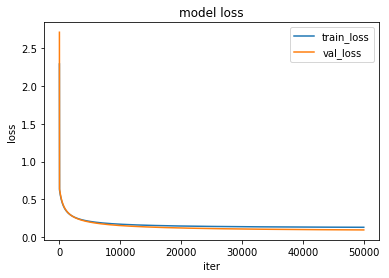

In [46]:
plt.plot(range(1, model.iter+1), model.loss, label="train_loss")
plt.plot(range(1,model.iter+1), model.val_loss, label="val_loss")
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()
plt.show()

## 【問題8】決定領域の可視化

In [47]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def logistic_region(X, y, model, step=0.01, title='logistic region', xlabel='petal_length', ylabel='petal_width', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

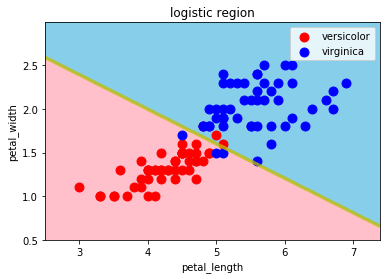

In [48]:
logistic_region(X,y,model)

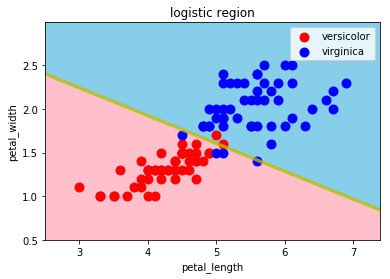

In [51]:
logistic_region(X,y,Lr)

In [52]:
model.theta

array([2.96281298, 7.49591775])

In [53]:
model.bias

-26.834523515981054